<center><h1>DSCI 552 Machine Learning for Data Science HW1</h1></center>
<br>
<center> <font size="4">Name:Chung Ming Wu</font></center>

<center> USC_ID:7703568593</center>
    
<center> Github_Username:andywu96 </center>

### (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
#open arff file
data_2C = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
#convert to dataframe
df_2C = pd.DataFrame(data_2C[0])

In [3]:
df_2C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [4]:
# check data type
df_2C.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

### (b) Pre-Processing and Exploratory data analysis:
### (b)-(i). Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [5]:
#Pre-processing 
#label of column "class from string to Binary NO=0 AB=1 int type
label_column2C = [i for i in data_2C[0]['class'].tolist()]    

class_column2C= []
for j in label_column2C:                           
    if j == b'Abnormal':
        class_column2C.append(1) 
    else:
        class_column2C.append(0)
df_2C['class'] = class_column2C

In [6]:
df_2C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


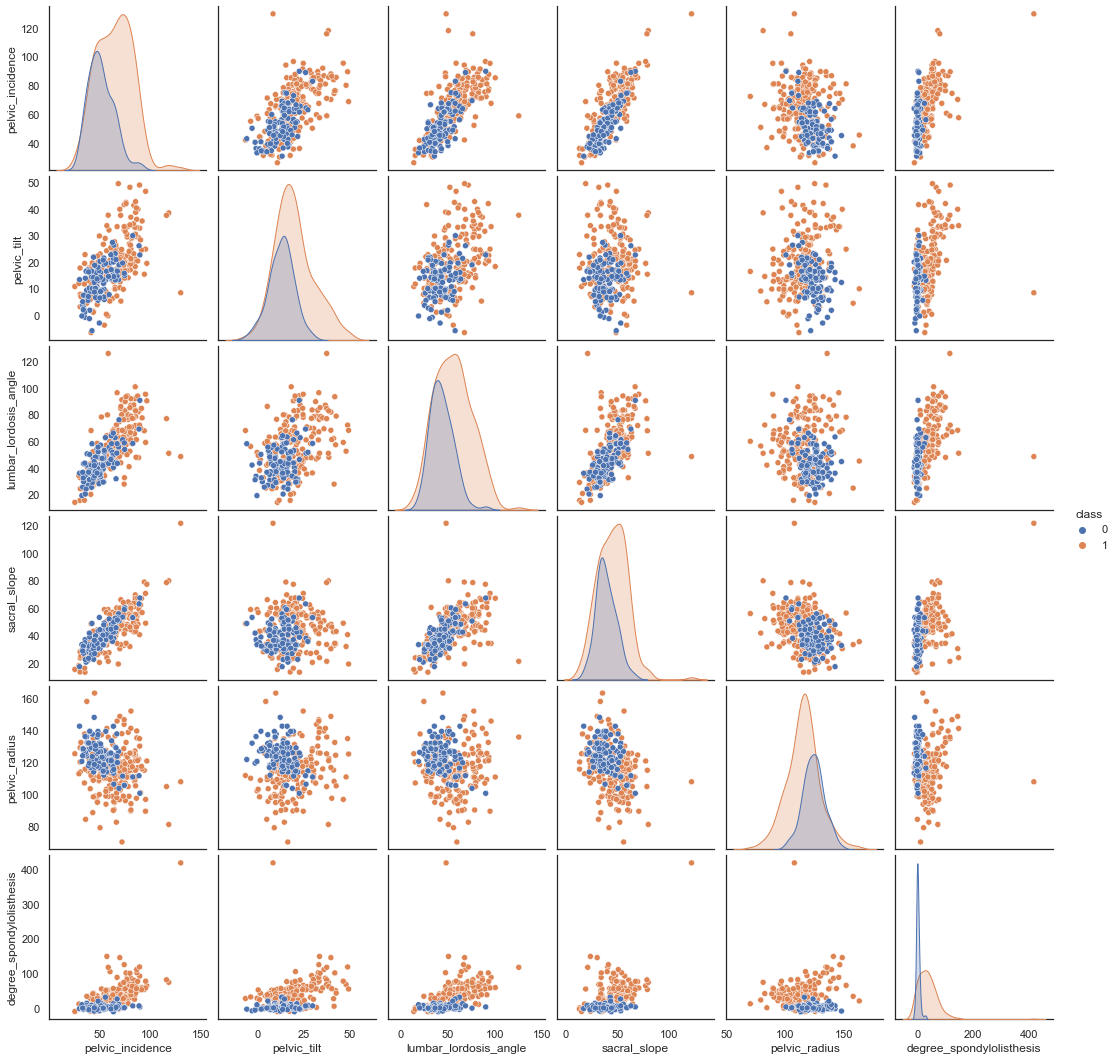

In [7]:
#draw the scatterplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white") 
sns.pairplot(df_2C, hue="class")       
plt.show()

### (b)-(ii). Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

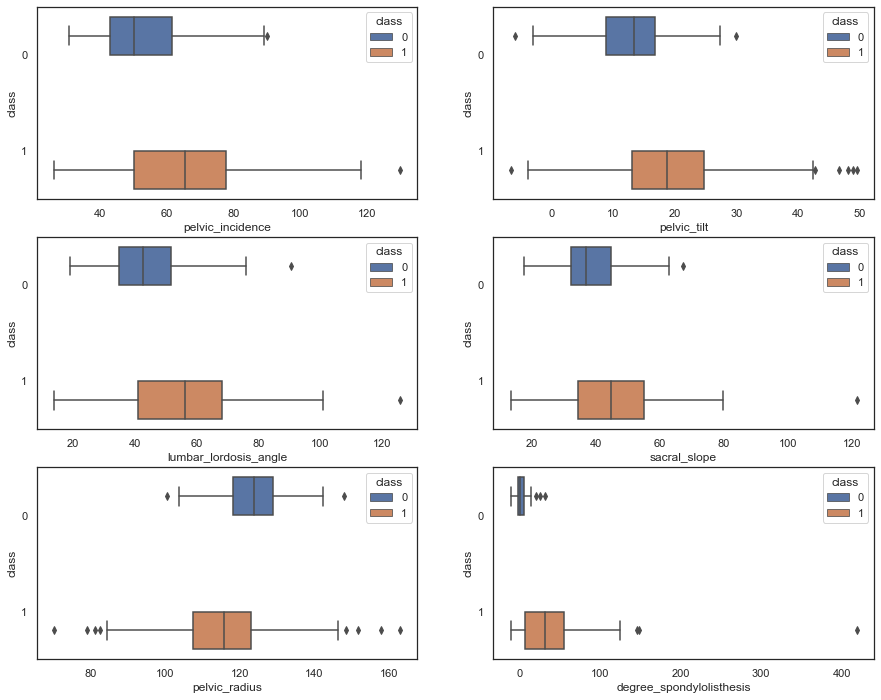

In [8]:
#Pelvic Incidence Boxes 
z, axes = plt.subplots(3, 2, figsize=(15,12))
y = 0
for col in df_2C.columns[:-1]:
    i, j = divmod(y, 2)
    
    sns.boxplot(x=col, y="class", data=df_2C, orient="h", ax=axes[i, j],hue="class" )
    y=y+1
    
plt.show()  

### (b)-(iii). Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [9]:
train_set = pd.concat([df_2C[df_2C["class"] == 0][0:70] , df_2C[df_2C["class"] == 1][0:140]],axis=0)
test_set = pd.concat([df_2C[df_2C["class"] == 0][70:] , df_2C[df_2C["class"] == 1][140:]],axis=0)

In [10]:
train_set 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [11]:
test_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


### (c) Classification using KNN on Vertebral Column Data Set

### (c)-(i). Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [12]:
# split train test data
X_train = train_set.drop('class', axis=1)
X_test = test_set.drop('class', axis=1)
y_train = pd.concat([df_2C["class"][df_2C["class"] == 0][0:70] , df_2C["class"][df_2C["class"] == 1][0:140]],axis=0)
y_test  = pd.concat([df_2C["class"][df_2C["class"] == 0][70:] , df_2C["class"][df_2C["class"] == 1][140:]],axis=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Fit KNN model, assume K = n_neighbors = 3
model_1 = KNeighborsClassifier(n_neighbors=3, p =2, metric = 'euclidean' )
model_1.fit(X_train, y_train)
# Find testing error
round(1-model_1.score(X_test, y_test),3)

0.08

In [15]:
# Find training error
round(1-model_1.score(X_train, y_train),3)

0.105

### When we assume k=3 to run KNN, we found that the test error rate without data scaling is 8% and training error rate is 10.5% 

### (c)-(ii). Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k in {208; 205; : : : ; 7; 4; 1}  (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*

In [16]:
#Create KNN Model to find optimal k*
nn = range(208,-2, -3)
training_error_rate_model3 = []
test_error_rate_model3 = []


for k in nn:
    model_3 = KNeighborsClassifier(n_neighbors=k, p=2)
    model_3.fit(X_train, y_train)
    training_error_rate_model3.append(1-model_3.score(X_train,
                                                y_train))
    test_error_rate_model3.append(1-model_3.score(X_test,
                                            y_test))

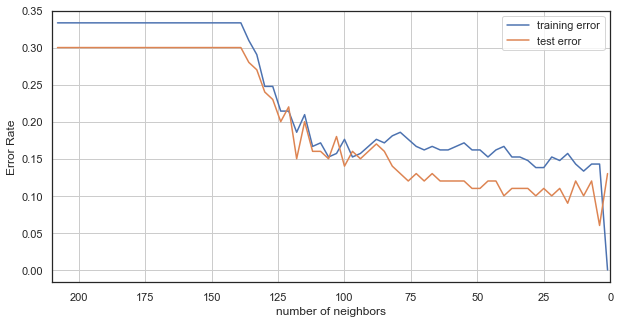

In [17]:
#Plot train and test errors
plt.figure(figsize=(10,5))
plt.xlim(210,0)
plt.plot(nn, training_error_rate_model3, label="training error")
plt.plot(nn, test_error_rate_model3, label="test error")
plt.ylabel("Error Rate")
plt.xlabel("number of neighbors")
plt.legend()
plt.grid()

In [18]:
# Use the index to find the k* 
lowest_testing_Error = test_error_rate_model3.index(min(test_error_rate_model3))
print('Best testing error K* is:', nn[lowest_testing_Error])
print('Best testing error is:', round(min(test_error_rate_model3),2))

Best testing error K* is: 4
Best testing error is: 0.06


### According to the plot, k* = 4, which has optimal accuracy rate 94%, also when k = 4, test error is the lowest and the train error is low.

In [19]:
from sklearn.metrics import confusion_matrix  

In [20]:
model_4 = KNeighborsClassifier(n_neighbors=4, p=2 )
model_4.fit(X_train, y_train)
model_4.score(X_test, y_test)

0.94

In [21]:
#Predict y value use X test data
y_pred = model_4.predict(X_test)

#Calculate the confusion matrix
Confusion_matrix = confusion_matrix(y_test, y_pred, labels = [0,1])

#Calculate true positive rate and true negative rate
#Let True positive when prediction = 1, acutal = 1 

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()   
print('Confusion Matrix = ',Confusion_matrix)
print('True Positive Rate = ', round(tp/(tp+fn),4))
print('True Negative Rate = ', round(tn/(tn+fp),4))

#Calculate the precision
from sklearn.metrics import precision_score                
Precision = round(precision_score(y_test, y_pred),4)
print('Precision = ', Precision)

 #Calculate the F1 score
from sklearn.metrics import f1_score                      
F1_score = round(f1_score(y_test, y_pred),4)
print('F1 Score = ', F1_score)

Confusion Matrix =  [[25  5]
 [ 1 69]]
True Positive Rate =  0.9857
True Negative Rate =  0.8333
Precision =  0.9324
F1 Score =  0.9583


### (c)-(iii). Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N =  {10; 20; 30; : : : ; 210}. Note: for each N, select your training set by choosing the first [N/3] rows of Class 0 and the first [N- N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1; 6; 11; : : : ; 196}. This plot is called a Learning Curve.

In [22]:
#Class 0 [N/3]   Class 1 N - [N/3]
import math 

#Create KNN model with different size of training data set to find learning curve

training_error_rate_model5 = []
test_error_rate_model5 = []

for N in range(10,220,10):
    
    training_error_rate_m5 = []
    test_error_rate_m5 = []
    N_3 = math.floor(N/3)
    
    X_train_n = pd.concat([train_set [train_set ["class"] == 0][:N_3] , train_set [train_set ["class"] == 1][:N-N_3]],axis=0)
    X_train_n = X_train_n.drop('class', axis=1)
    y_train_n = pd.concat([y_train[y_train == 0][:N_3] , y_train[y_train == 1][:N-N_3]],axis=0)
        
    for k in range(1,N,5):
        
        model_5 = KNeighborsClassifier(n_neighbors=k, p=2 )
        model_5.fit(X_train_n, y_train_n)
        test_error_rate_m5.append(1-model_5.score(X_test,y_test))
        training_error_rate_m5.append(1-model_5.score(X_train_n,
                                                y_train_n))
    test_error_rate_model5.append(min(test_error_rate_m5))
    training_error_rate_model5.append(min(training_error_rate_m5))

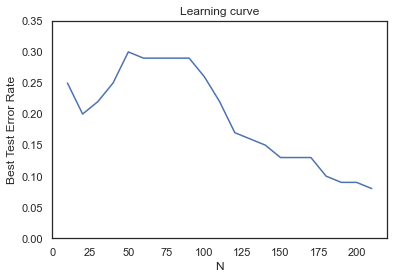

In [23]:
#Plot learning curve
plt.xlim(0,220)
plt.ylim(0,0.35)
plt.plot(range(10,220,10), test_error_rate_model5) 
plt.xlabel('N')
plt.ylabel('Best Test Error Rate') 
plt.title('Learning curve')
plt.show()

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when k in  {1; 6; 11; : : : ; 196}.

### (d)-(i)-(A) Minkowski Distance: which becomes Manhattan Distance with p = 1.

In [24]:
#Best test error and best k with Manhattan Distance (p=1)

training_error_rate_model6 = []
test_error_rate_model6 = []

M = range(1,201,5)
for k in M:
    model_6 = KNeighborsClassifier(n_neighbors=k, p= 1, metric = 'manhattan')
    model_6.fit(X_train, y_train)
    test_error_rate_model6.append(1-model_6.score(X_test, y_test))
    training_error_rate_model6.append(1-model_6.score(X_train,
                                                y_train))
    

Manhattan Distance:
Best test error =  0.11


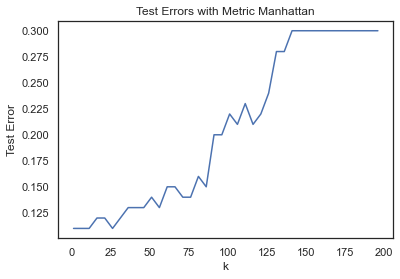

In [25]:
# Use the index to find the k*  
best_test_Error_Manhattan = test_error_rate_model6.index(min(test_error_rate_model6))
print('Manhattan Distance:')
print('Best test error = ', round(min(test_error_rate_model6),2))

#Plot 
plt.plot(range(1,201,5),test_error_rate_model6) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Metric Manhattan')
plt.show() 

### I found that when k= 1, 6, 11, 26  we can get all same test error = 11%, thus, using lowest training error to decide the best k*, 

In [26]:
Mannheim_df = pd.DataFrame(list(zip(M, training_error_rate_model6, test_error_rate_model6)),  
                  columns=['k','training_error_rate', 'test_error_rate']) 

Mannheim_df.iloc[[0,1,2,5],:]

,k,training_error_rate,test_error_rate
0,1,0.000000,0.11
1,6,0.138095,0.11
2,11,0.142857,0.11
5,26,0.166667,0.11


### when k=1, even with lowest training error, it seems to be overfitting with training error = 0, so decide to use k=6, which has the lowest training error 0.138

### (d)-(i)-(B) with log10(p) is {0:1; 0:2; 0:3; : : : ; 1}. In this case, use the k* you found for the Manhattan distance in (d)-(i)-(A). What is the best log10(p)?

In [27]:
#Best test error and best k with Minkowski Distance 

training_error_rate_model7 = []
test_error_rate_model7 = []

P = np.linspace(0.1,1,10)

for j in np.linspace(0.1,1,10):  
    p = pow(10,j)
    model_7 = KNeighborsClassifier(n_neighbors=6, p= p)
    model_7.fit(X_train, y_train)
    test_error_rate_model7.append(1-model_7.score(X_test, y_test))
    training_error_rate_model7.append(1-model_7.score(X_train,
                                                y_train))

Best log10_(p) =  0.6
Best test error =  0.06


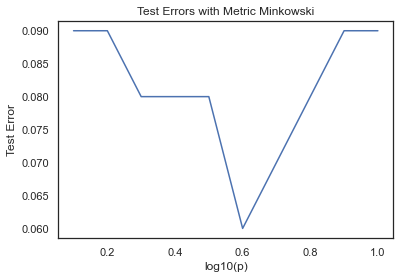

In [28]:
# Use the index to find the k*  
best_log10_p = test_error_rate_model7.index(min(test_error_rate_model7))

print('Best log10_(p) = ', P[best_log10_p])
print('Best test error = ', round(min(test_error_rate_model7),2))

#Plot the best test error rate
plt.plot(np.linspace(0.1,1,10), test_error_rate_model7) 
plt.xlabel('log10(p)')
plt.ylabel('Test Error') 
plt.title('Test Errors with Metric Minkowski')
plt.show()

### (d)-(i)-(C). which becomes Chebyshev Distance with p is  ∞

In [29]:
#Best test error and best k with Chebyshev Distance (p= infinite )

training_error_rate_model8 = []
test_error_rate_model8 = []

M = range(1,201,5)
for k in M:
    model_8 = KNeighborsClassifier(n_neighbors=k, p=float('inf'),metric = 'chebyshev')
    model_8.fit(X_train, y_train)
    test_error_rate_model8.append(1-model_8.score(X_test, y_test))
    training_error_rate_model8.append(1-model_8.score(X_train,
                                                y_train))

Chebyshev Distance :
Best testing error K* =  16
Best test error =  0.08


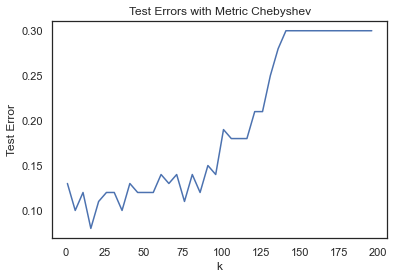

In [30]:
# Use the index to find the k*  
best_test_Error_Chebyshev = test_error_rate_model8.index(min(test_error_rate_model8))
print('Chebyshev Distance :')
print('Best testing error K* = ', M[best_test_Error_Chebyshev])
print('Best test error = ', round(min(test_error_rate_model8),2))

#Plot 
plt.plot(range(1,201,5),test_error_rate_model8) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Metric Chebyshev')
plt.show()

### (d)-(ii) Mahalanobis Distance

In [31]:
#Best test error and best k with Chebyshev Distance (p= infinite )

training_error_rate_model9 = []
test_error_rate_model9 = []
   
M = range(1,201,5)
for k in M:
    model_9 = KNeighborsClassifier(n_neighbors=k, metric = 'mahalanobis', 
                                   metric_params={'VI': np.linalg.pinv(np.cov(X_train.T))})
    model_9.fit(X_train, y_train)
    test_error_rate_model9.append(1-model_9.score(X_test, y_test))
    training_error_rate_model9.append(1-model_9.score(X_train,
                                                y_train))

Mahalanobis Distance :
Best testing error K* =  1
Best test error =  0.15


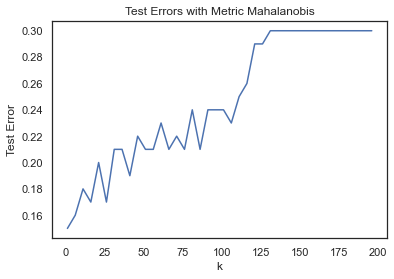

In [32]:
# Use the index to find the k*  
best_test_Error_Mahalanobis = test_error_rate_model9.index(min(test_error_rate_model9))
print('Mahalanobis Distance :')
print('Best testing error K* = ', M[best_test_Error_Mahalanobis])
print('Best test error = ', round(min(test_error_rate_model9),2))

#Plot 
plt.plot(range(1,201,5),test_error_rate_model9) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Metric Mahalanobis')
plt.show()

### (e)The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater in uence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k in  {1; 6; 11; : : : ; 196}

### Euclidean weighted distances

Euclidean Weighted Distance:
Best testing error K* =  6
Best test error =  0.1


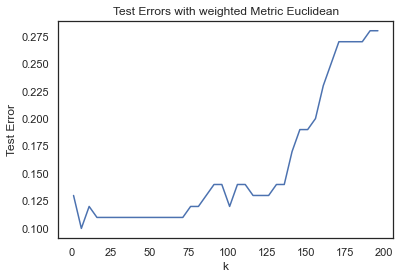

In [33]:
#Best test error and best k with Euclidean Distance (p=2)

training_error_rate_model10 = []
test_error_rate_model10 = []

M = range(1,201,5)
for k in M:
    model_10 = KNeighborsClassifier(n_neighbors=k, p=2,  weights='distance' )
    model_10.fit(X_train, y_train)
    test_error_rate_model10.append(1-model_10.score(X_test, y_test))
    training_error_rate_model10.append(1-model_10.score(X_train,
                                                y_train))
                                   
# Use the index to find the k*  
best_test_Error_weighted_Euclidean = test_error_rate_model10.index(min(test_error_rate_model10))
print('Euclidean Weighted Distance:')
print('Best testing error K* = ', M[best_test_Error_weighted_Euclidean])
print('Best test error = ', round(min(test_error_rate_model10),2))

#Plot 
plt.plot(range(1,201,5),test_error_rate_model10) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with weighted Metric Euclidean')
plt.show()

### Manhattan weighted distances

Manhattan Weighted Distance:
Best testing error K* =  26
Best test error =  0.1


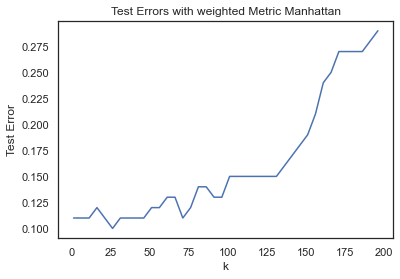

In [34]:
#Best test error and best k with Manhattan Distance (p=1)

training_error_rate_model11 = []
test_error_rate_model11 = []

M = range(1,201,5)
for k in M:
    model_11 = KNeighborsClassifier(n_neighbors=k, p= 1,  weights='distance')
    model_11.fit(X_train, y_train)
    test_error_rate_model11.append(1-model_11.score(X_test, y_test))    
    training_error_rate_model11.append(1-model_11.score(X_train,
                                                y_train))

# Use the index to find the k*  
best_test_Error_weighted_Manhattan = test_error_rate_model11.index(min(test_error_rate_model11))
print('Manhattan Weighted Distance:')
print('Best testing error K* = ', M[best_test_Error_weighted_Manhattan])
print('Best test error = ', round(min(test_error_rate_model11),2))

#Plot 
plt.plot(range(1,201,5),test_error_rate_model11) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with weighted Metric Manhattan')
plt.show()

### Chebyshev weighted distances

Chebyshev Weighted Distance :
Best testing error K* =  16
Best test error =  0.11


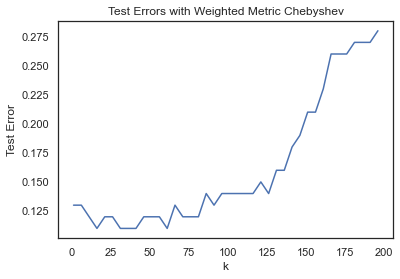

In [35]:
#Best test error and best k with Chebyshev Distance (p= infinite )

training_error_rate_model12 = []
test_error_rate_model12 = []

M = range(1,201,5)
for k in M:
    model_12 = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev', weights='distance')
    model_12.fit(X_train, y_train)
    test_error_rate_model12.append(1-model_12.score(X_test, y_test))
    training_error_rate_model12.append(1-model_12.score(X_train,
                                                y_train))
# Use the index to find the k*  
best_test_Error_weighted_Chebyshev = test_error_rate_model12.index(min(test_error_rate_model12))
print('Chebyshev Weighted Distance :')
print('Best testing error K* = ', M[best_test_Error_weighted_Chebyshev])
print('Best test error = ', round(min(test_error_rate_model12),2))

#Plot 
plt.plot(range(1,201,5),test_error_rate_model12) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Weighted Metric Chebyshev')
plt.show()

### (f) What is the lowest training error rate you achieved in this homework?

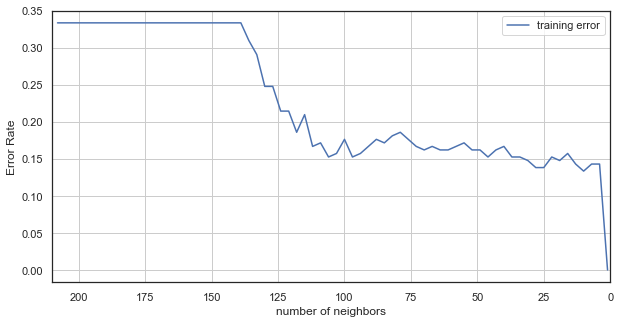

In [36]:
#Plot train and test errors
plt.figure(figsize=(10,5))
plt.xlim(210,0)
plt.plot(nn, training_error_rate_model3, label="training error")
plt.ylabel("Error Rate")
plt.xlabel("number of neighbors")
plt.legend()
plt.grid()

### The lowest training error is 0 when k = 1 in KNN model with Euclidean metric 